# Analyzing the hospital management datasets

# 💰 Financial Performance & Revenue Analysis

In [2]:
#import the necessary librabries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# import the billing dataset
billing_data = pd.read_csv('C:/Users/enosa/OneDrive/Desktop/Data Analysis/Datasets/Hospital management/billing.csv')
billing_data

,bill_id,patient_id,treatment_id,bill_date,amount,payment_method,payment_status
0,B001,P034,T001,2023-08-09,3941.97,Insurance,Pending
1,B002,P032,T002,2023-06-09,4158.44,Insurance,Paid
2,B003,P048,T003,2023-06-28,3731.55,Insurance,Paid
3,B004,P025,T004,2023-09-01,4799.86,Insurance,Failed
4,B005,P040,T005,2023-07-06,582.05,Credit Card,Pending
...,...,...,...,...,...,...,...
195,B196,P045,T196,2023-10-26,2477.80,Cash,Pending
196,B197,P001,T197,2023-04-01,975.49,Cash,Pending
197,B198,P022,T198,2023-05-15,3383.72,Cash,Failed
198,B199,P017,T199,2023-05-01,1472.17,Credit Card,Paid


In [4]:
# Convert date column to datetime if not already
billing_data['date'] = pd.to_datetime(billing_data['bill_date'])

# Extract month and year for grouping
billing_data['month'] = billing_data['date'].dt.to_period('M').astype(str)

# Group by month and sum the amount
monthly_revenue = billing_data.groupby('month')['amount'].sum().reset_index()

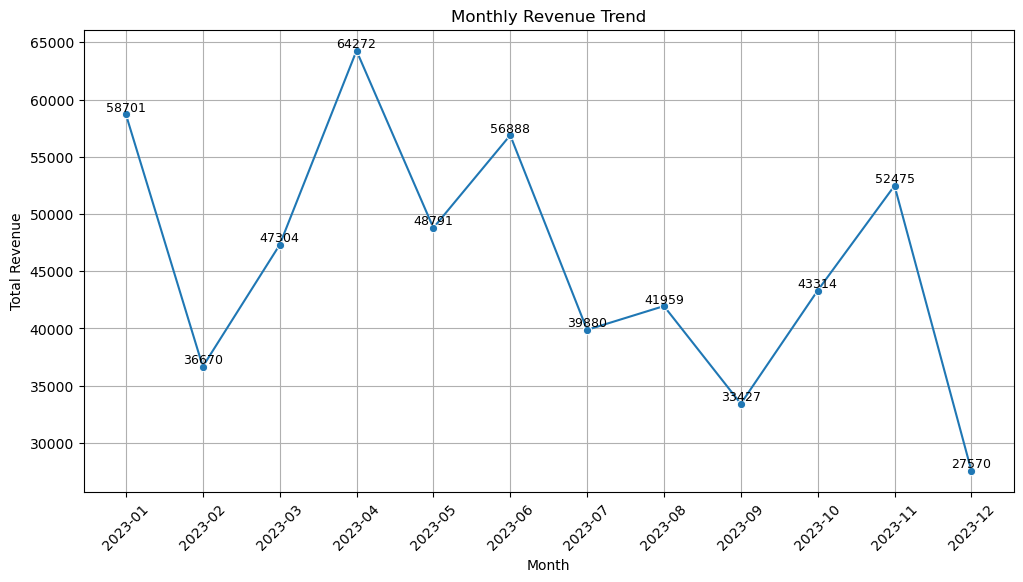

In [5]:
#monthly revenue trend
billing_data['date'] = pd.to_datetime(billing_data['date'])
billing_data['month'] = billing_data['date'].dt.to_period('M').astype(str)
monthly_revenue = billing_data.groupby('month')['amount'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='month', y='amount', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid()

# Add data labels
for i, row in monthly_revenue.iterrows():
    plt.text(i, row['amount'], f"{row['amount']:.0f}", ha='center', va='bottom', fontsize=9)

plt.show()

payment_status
Pending    69
Failed     67
Paid       64
Name: count, dtype: int64


C:\Users\enosa\AppData\Local\Temp\ipykernel_452332\3442992972.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_status_counts.index, y=payment_status_counts.values, palette='viridis')


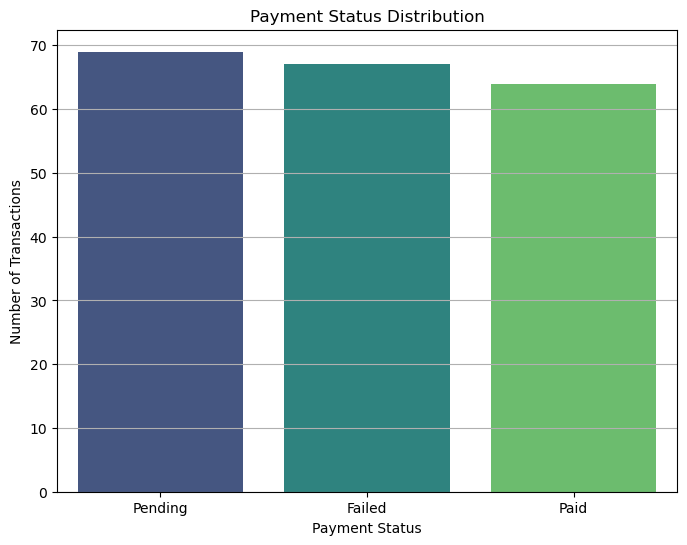

In [ ]:
# payment status analysis
payment_status_counts = billing_data['payment_status'].value_counts()
print(payment_status_counts)
plt.figure(figsize=(8, 6))
sns.barplot(x=payment_status_counts.index, y=payment_status_counts.values, palette='viridis')
plt.title('Payment Status Distribution')
plt.xlabel('Payment Status')
plt.ylabel('Number of Transactions')
plt.grid(axis='y')
plt.show()

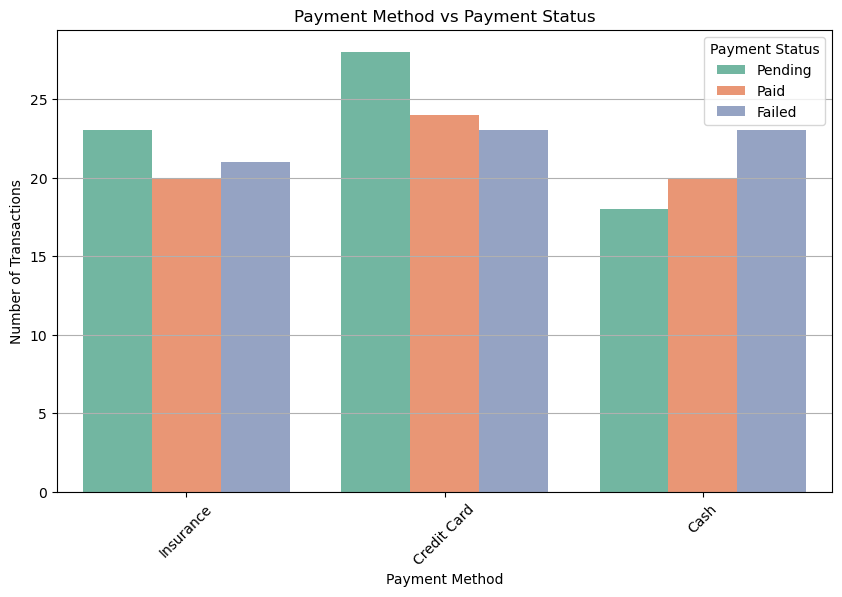

In [7]:
# payment method and their status counts
plt.figure(figsize=(10, 6))
sns.countplot(data=billing_data, x='payment_method', hue='payment_status', palette='Set2')
plt.title('Payment Method vs Payment Status')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.legend(title='Payment Status')
plt.grid(axis='y')
plt.show()


C:\Users\enosa\AppData\Local\Temp\ipykernel_452332\657246970.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payer_type_counts.index, y=payer_type_counts.values, palette='pastel')


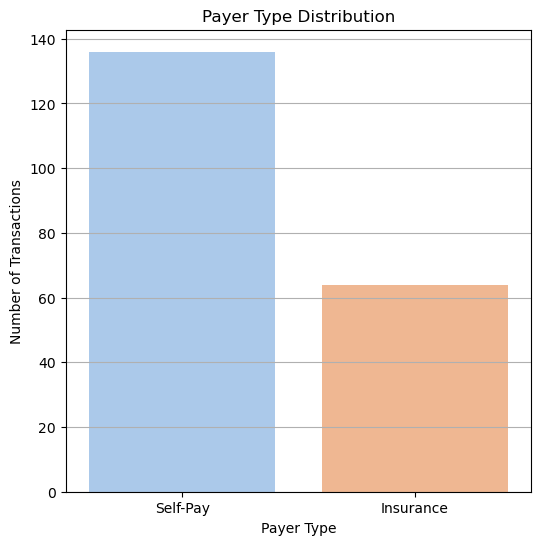

In [8]:
# create column for payer type as insurance or self-pay
billing_data['payer_type'] = billing_data['payment_method'].apply(lambda x: 'Insurance' if x == 'Insurance' else 'Self-Pay')
payer_type_counts = billing_data['payer_type'].value_counts()
plt.figure(figsize=(6, 6))
sns.barplot(x=payer_type_counts.index, y=payer_type_counts.values, palette='pastel')
plt.title('Payer Type Distribution')
plt.xlabel('Payer Type')
plt.ylabel('Number of Transactions')
plt.grid(axis='y')
plt.show()

In [9]:
''' Hospital Billing Data Analysis – Documentation & Findings
Dataset Overview
The dataset analyzed contains hospital billing records, including:

Date of transaction
Amount billed
Payment status (e.g., Paid, Unpaid)
Payment method (e.g., Insurance, Cash, Card)
Payer type (derived as Insurance or Self-Pay)
Key Findings
Monthly Revenue Trend

The analysis visualized monthly revenue, showing fluctuations in total revenue over time.
Some months may show dips or spikes, indicating possible seasonal trends or operational changes.
Payment Status Distribution

The majority of transactions are marked as "Paid," but a notable portion remains "Unpaid."
High unpaid rates can impact cash flow and financial stability.
Payment Method vs. Payment Status

Insurance is a common payment method, but self-pay (cash/card) transactions are also significant.
Unpaid transactions may be more prevalent in certain payment methods.
Payer Type Distribution

Insurance payments dominate, but self-pay is still a considerable portion.
The balance between insurance and self-pay can affect collection strategies and revenue cycles.
Problems Identified
Unpaid Transactions: A significant number of bills remain unpaid, especially among self-pay patients.
Revenue Fluctuations: Monthly revenue is inconsistent, which may affect budgeting and resource allocation.
Possible Solutions
Improve Payment Collection: Implement reminders, flexible payment plans, or incentives for early payment, especially targeting self-pay patients.
Enhance Insurance Processing: Streamline insurance claim processes to reduce delays and denials.
Monitor Revenue Trends: Regularly review revenue trends to identify and address causes of dips (e.g., operational inefficiencies, seasonal factors).
Patient Education: Educate patients on payment options and the importance of timely payments.
Summary:
The analysis highlights the need for improved payment collection strategies and closer monitoring of revenue trends. Addressing unpaid bills and understanding payment method patterns can help optimize hospital financial performance. '''

' Hospital Billing Data Analysis – Documentation & Findings\nDataset Overview\nThe dataset analyzed contains hospital billing records, including:\n\nDate of transaction\nAmount billed\nPayment status (e.g., Paid, Unpaid)\nPayment method (e.g., Insurance, Cash, Card)\nPayer type (derived as Insurance or Self-Pay)\nKey Findings\nMonthly Revenue Trend\n\nThe analysis visualized monthly revenue, showing fluctuations in total revenue over time.\nSome months may show dips or spikes, indicating possible seasonal trends or operational changes.\nPayment Status Distribution\n\nThe majority of transactions are marked as "Paid," but a notable portion remains "Unpaid."\nHigh unpaid rates can impact cash flow and financial stability.\nPayment Method vs. Payment Status\n\nInsurance is a common payment method, but self-pay (cash/card) transactions are also significant.\nUnpaid transactions may be more prevalent in certain payment methods.\nPayer Type Distribution\n\nInsurance payments dominate, but se

# ⏳ Operational Efficiency & Resource Utilization

In [10]:
# causes of no-show/cancellation in appointments
appointments_data = pd.read_csv('C:/Users/enosa/OneDrive/Desktop/Data Analysis/Datasets/Hospital management/appointments.csv')
appointments_data

,appointment_id,patient_id,doctor_id,appointment_date,appointment_time,reason_for_visit,status
0,A001,P034,D009,2023-08-09,15:15:00,Therapy,Scheduled
1,A002,P032,D004,2023-06-09,14:30:00,Therapy,No-show
2,A003,P048,D004,2023-06-28,8:00:00,Consultation,Cancelled
3,A004,P025,D006,2023-09-01,9:15:00,Consultation,Cancelled
4,A005,P040,D003,2023-07-06,12:45:00,Emergency,No-show
...,...,...,...,...,...,...,...
195,A196,P045,D006,2023-10-26,9:45:00,Checkup,Cancelled
196,A197,P001,D005,2023-04-01,13:30:00,Emergency,No-show
197,A198,P022,D006,2023-05-15,8:30:00,Therapy,No-show
198,A199,P017,D001,2023-05-01,12:45:00,Follow-up,Completed


C:\Users\enosa\AppData\Local\Temp\ipykernel_452332\161652220.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=no_show['doctor_id'].value_counts().index, y=no_show['doctor_id'].value_counts().values, palette='viridis')


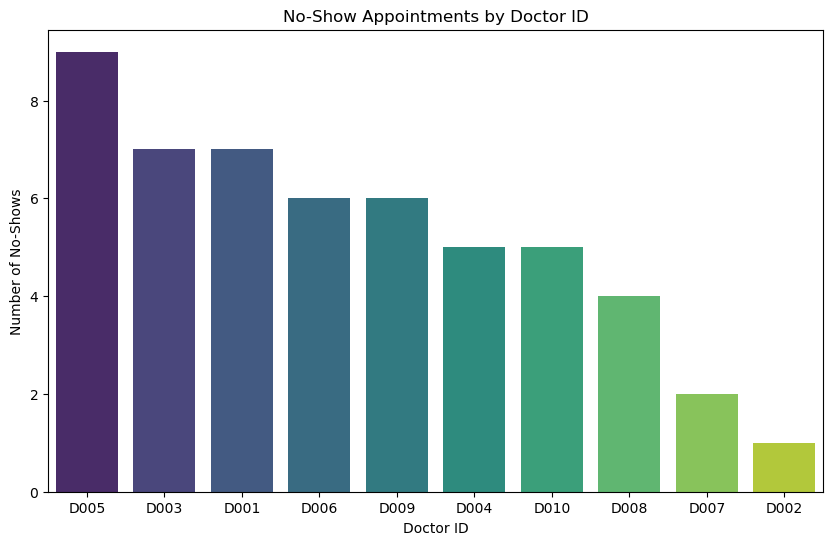

In [11]:
# no-show/cancellation by doctor id analysis
no_show = appointments_data[appointments_data['status'] == 'No-show']
no_show.groupby('doctor_id')['status'].count()
#plot the no-show by doctor id
plt.figure(figsize=(10, 6))
sns.barplot(x=no_show['doctor_id'].value_counts().index, y=no_show['doctor_id'].value_counts().values, palette='viridis')
plt.title('No-Show Appointments by Doctor ID')
plt.xlabel('Doctor ID')
plt.ylabel('Number of No-Shows')
plt.show()

C:\Users\enosa\AppData\Local\Temp\ipykernel_452332\837812433.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = no_show['reason_for_visit'].value_counts().index, y = no_show['reason_for_visit'].value_counts().values, palette='viridis')


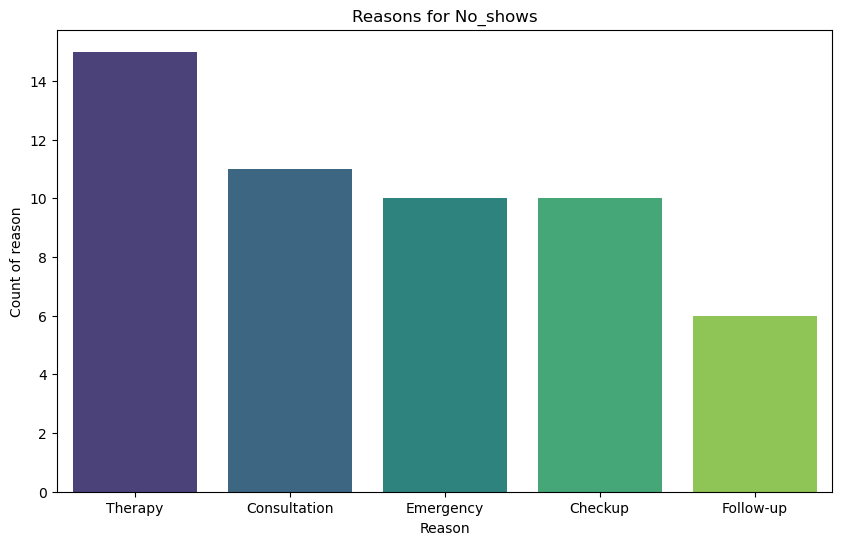

In [12]:
# causes of No-show anlaysis
no_show.groupby('reason_for_visit')['status'].count()
#plot the values
plt.figure(figsize=(10,6))
sns.barplot(x = no_show['reason_for_visit'].value_counts().index, y = no_show['reason_for_visit'].value_counts().values, palette='viridis')
plt.title('Reasons for No_shows')
plt.xlabel('Reason')
plt.ylabel('Count of reason')
plt.show()

In [13]:
#Specialization who had most No-shows
doctors = pd.read_csv('C:/Users/enosa/OneDrive/Desktop/Data Analysis/Datasets/Hospital management/doctors.csv')
#merge appointments and doctors dataset
data = pd.merge(appointments_data,doctors, on='doctor_id')
data

,appointment_id,patient_id,doctor_id,appointment_date,appointment_time,reason_for_visit,status,first_name,last_name,specialization,phone_number,years_experience,hospital_branch,email
0,A001,P034,D009,2023-08-09,15:15:00,Therapy,Scheduled,Sarah,Smith,Pediatrics,7387087517,26,Central Hospital,dr.sarah.smith@hospital.com
1,A002,P032,D004,2023-06-09,14:30:00,Therapy,No-show,David,Jones,Pediatrics,6594221991,28,Central Hospital,dr.david.jones@hospital.com
2,A003,P048,D004,2023-06-28,8:00:00,Consultation,Cancelled,David,Jones,Pediatrics,6594221991,28,Central Hospital,dr.david.jones@hospital.com
3,A004,P025,D006,2023-09-01,9:15:00,Consultation,Cancelled,Alex,Davis,Pediatrics,6570137231,23,Central Hospital,dr.alex.davis@hospital.com
4,A005,P040,D003,2023-07-06,12:45:00,Emergency,No-show,Jane,Smith,Pediatrics,8737740598,19,Eastside Clinic,dr.jane.smith@hospital.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,A196,P045,D006,2023-10-26,9:45:00,Checkup,Cancelled,Alex,Davis,Pediatrics,6570137231,23,Central Hospital,dr.alex.davis@hospital.com
196,A197,P001,D005,2023-04-01,13:30:00,Emergency,No-show,Sarah,Taylor,Dermatology,9118538547,26,Central Hospital,dr.sarah.taylor@hospital.com
197,A198,P022,D006,2023-05-15,8:30:00,Therapy,No-show,Alex,Davis,Pediatrics,6570137231,23,Central Hospital,dr.alex.davis@hospital.com
198,A199,P017,D001,2023-05-01,12:45:00,Follow-up,Completed,David,Taylor,Dermatology,8322010158,17,Westside Clinic,dr.david.taylor@hospital.com


In [14]:
#specialization with most No-shows
no_show_data = data[data['status'] == 'No-show']
no_show_data.groupby('specialization')['status'].count()

specialization
Dermatology    20
Oncology        7
Pediatrics     25
Name: status, dtype: int64

In [15]:
#No-show analysis by day of week
#Derive weekday from date column
appointments_data['appointment_date'] = pd.to_datetime(appointments_data['appointment_date'])
appointments_data['day_of_week'] = appointments_data['appointment_date'].dt.day_name()
appointments_data

,appointment_id,patient_id,doctor_id,appointment_date,appointment_time,reason_for_visit,status,day_of_week
0,A001,P034,D009,2023-08-09,15:15:00,Therapy,Scheduled,Wednesday
1,A002,P032,D004,2023-06-09,14:30:00,Therapy,No-show,Friday
2,A003,P048,D004,2023-06-28,8:00:00,Consultation,Cancelled,Wednesday
3,A004,P025,D006,2023-09-01,9:15:00,Consultation,Cancelled,Friday
4,A005,P040,D003,2023-07-06,12:45:00,Emergency,No-show,Thursday
...,...,...,...,...,...,...,...,...
195,A196,P045,D006,2023-10-26,9:45:00,Checkup,Cancelled,Thursday
196,A197,P001,D005,2023-04-01,13:30:00,Emergency,No-show,Saturday
197,A198,P022,D006,2023-05-15,8:30:00,Therapy,No-show,Monday
198,A199,P017,D001,2023-05-01,12:45:00,Follow-up,Completed,Monday


In [16]:
#Weekday with most no-shows
no_show_days = appointments_data[appointments_data['status']=='No-show']
no_show_days.groupby('day_of_week')['day_of_week'].count()

day_of_week
Friday        4
Monday        6
Saturday      5
Sunday       11
Thursday      6
Tuesday       7
Wednesday    13
Name: day_of_week, dtype: int64

C:\Users\enosa\AppData\Local\Temp\ipykernel_452332\1901713536.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=doctor_load.values, y=doctor_load.index, palette='viridis')


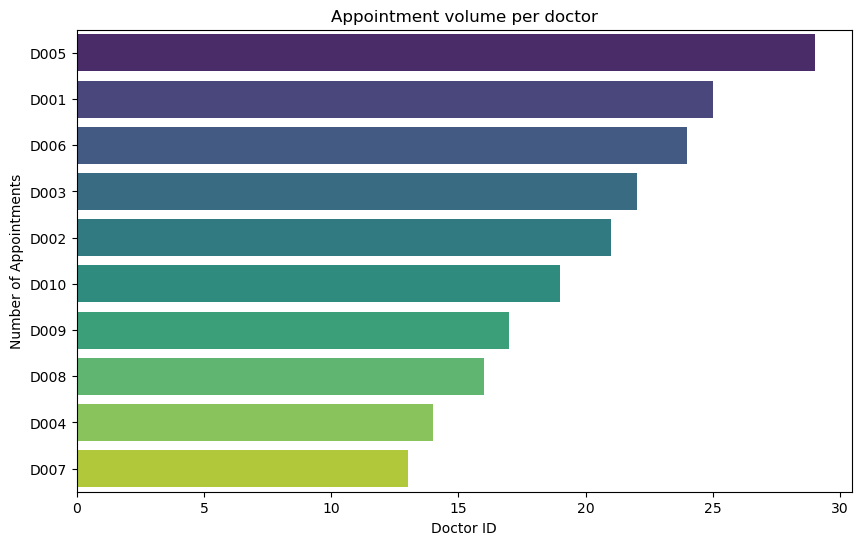

In [17]:
#doctor load distribution
doctor_load = appointments_data.groupby('doctor_id')['appointment_id'].count().sort_values(ascending=False)
doctor_load
plt.figure(figsize=(10, 6))
sns.barplot(x=doctor_load.values, y=doctor_load.index, palette='viridis')
plt.title('Appointment volume per doctor')
plt.xlabel('Doctor ID')
plt.ylabel('Number of Appointments')
plt.show()

C:\Users\enosa\AppData\Local\Temp\ipykernel_452332\2968270745.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = branch_load['hospital_branch'].values, y = branch_load['appointment_id'].index, palette = 'viridis')


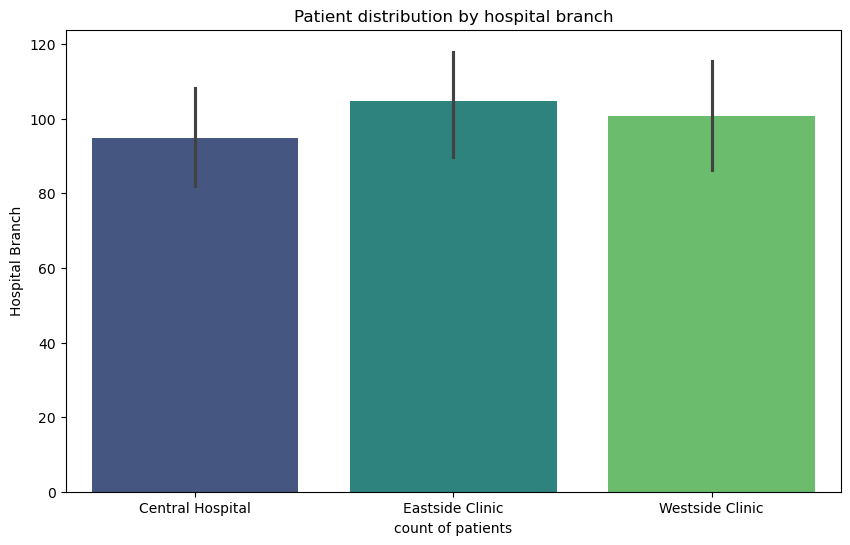

In [18]:
#load distribution by hospital branch
branch_load = pd.merge(appointments_data,doctors, on = 'doctor_id')
branch_load.groupby('hospital_branch')['appointment_id'].count()
plt.figure(figsize=(10,6))
sns.barplot(x = branch_load['hospital_branch'].values, y = branch_load['appointment_id'].index, palette = 'viridis')
plt.title('Patient distribution by hospital branch')
plt.xlabel('count of patients')
plt.ylabel('Hospital Branch')
plt.show()

specialization
Dermatology    70
Oncology       32
Pediatrics     98
Name: appointment_id, dtype: int64


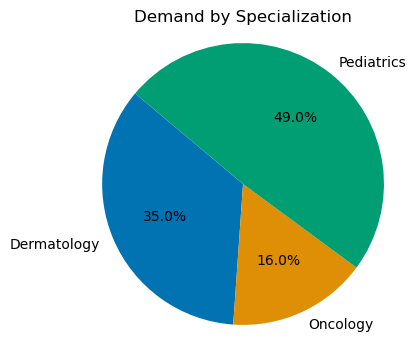

In [21]:
#demands by specialization
spec_data = pd.merge(appointments_data, doctors, on='doctor_id')
spec_counts = spec_data.groupby('specialization')['appointment_id'].count()
print(spec_counts)

# Pie chart for specialization demand
plt.figure(figsize=(4, 4))
plt.pie(spec_counts, labels=spec_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('colorblind'))
plt.title('Demand by Specialization')
plt.axis('equal')
plt.show()

In [ ]:
treat = pd.read_csv('C:/Users/enosa/OneDrive/Desktop/Data Analysis/Datasets/Hospital management/treatments.csv')
treat_counts = treat.groupby('treatment_type')['appointment_id'].count()
print(treat_counts)
plt.figure(figsize=(4,4))
plt.pie(treat_counts,labels= treat_counts.index, autopct= '%1.1f%%', startangle=140, colors= sns.color_palette('viridis'))
plt.title('treament demand analysis')
plt.show()


In [22]:
#patient wait time analysis
appointments_data


,appointment_id,patient_id,doctor_id,appointment_date,appointment_time,reason_for_visit,status,day_of_week
0,A001,P034,D009,2023-08-09,15:15:00,Therapy,Scheduled,Wednesday
1,A002,P032,D004,2023-06-09,14:30:00,Therapy,No-show,Friday
2,A003,P048,D004,2023-06-28,8:00:00,Consultation,Cancelled,Wednesday
3,A004,P025,D006,2023-09-01,9:15:00,Consultation,Cancelled,Friday
4,A005,P040,D003,2023-07-06,12:45:00,Emergency,No-show,Thursday
...,...,...,...,...,...,...,...,...
195,A196,P045,D006,2023-10-26,9:45:00,Checkup,Cancelled,Thursday
196,A197,P001,D005,2023-04-01,13:30:00,Emergency,No-show,Saturday
197,A198,P022,D006,2023-05-15,8:30:00,Therapy,No-show,Monday
198,A199,P017,D001,2023-05-01,12:45:00,Follow-up,Completed,Monday


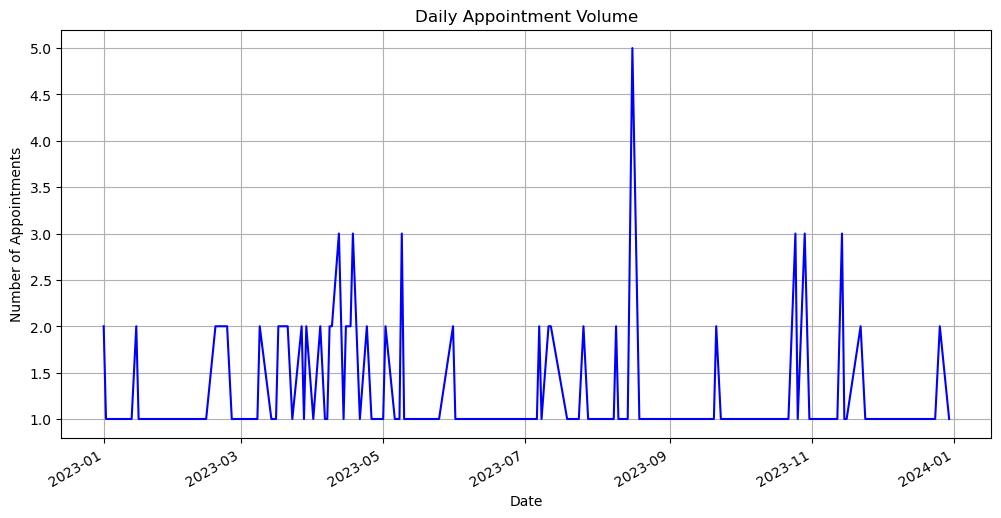

In [23]:
#peak appointment dates
peaks = appointments_data.groupby('appointment_date')['appointment_id'].count()
#line trend analysis
peaks.plot(figsize=(12,6), title='Daily Appointment Volume', color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Appointments')
plt.grid()
plt.show()

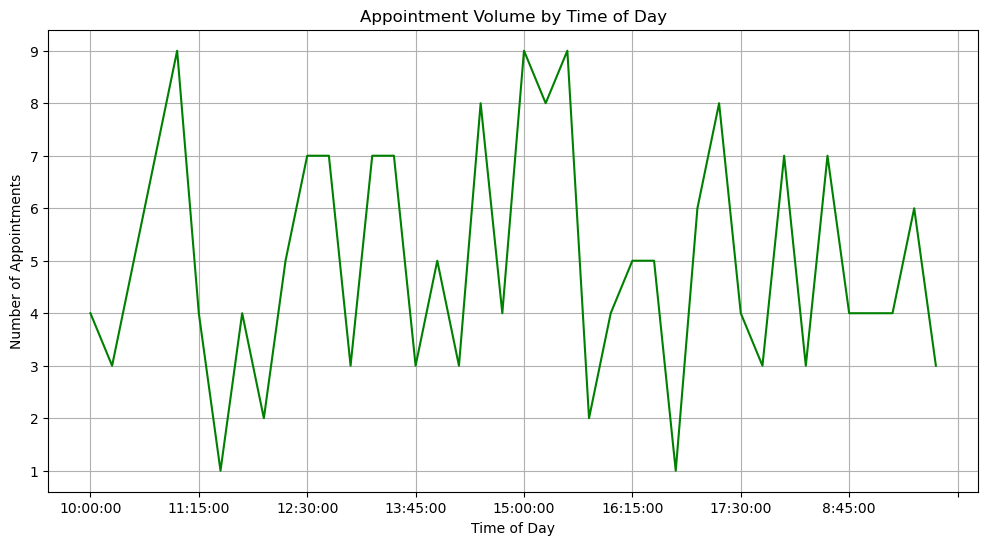

In [24]:
#trend analysis by time
peak_time = appointments_data.groupby('appointment_time')['appointment_id'].count()
peak_time.plot(figsize=(12,6), title='Appointment Volume by Time of Day', color='green')
plt.xlabel('Time of Day')
plt.ylabel('Number of Appointments')
plt.grid()
plt.show()

In [ ]:
'''Documentation & Report
Dataset Overview
This section analyzes hospital operational data, focusing on appointment management, doctor workload, patient distribution, specialization demand, and treatment types. The datasets include:

Appointment records (date, time, status, doctor, reason for visit)
Doctor details (specialization, branch)
Treatment records
Key Findings
No-Show and Cancellation Analysis

A significant number of appointments are marked as "No-show," impacting resource utilization and scheduling efficiency.
No-shows vary by doctor and reason for visit, with some doctors and visit reasons experiencing higher rates.
Doctor Workload Distribution

Appointment volume per doctor is uneven, with some doctors handling significantly more appointments than others.
This imbalance may affect staff burnout and patient wait times.
Branch Load Distribution

Patient distribution across hospital branches is not uniform.
Some branches experience higher patient loads, which may strain resources and affect service quality.
Specialization Demand

Certain medical specializations have higher appointment demand.
Understanding specialization trends helps in resource planning and recruitment.
Treatment Demand Analysis

Some treatment types are more frequently administered, indicating areas of high patient need.
No-Show Patterns by Day and Reason

No-shows are more common on specific days of the week and for certain visit reasons.
Identifying these patterns can help in targeted interventions.
Problems Identified
High No-Show Rates: Leads to wasted time slots, inefficient use of staff, and lost revenue.
Uneven Doctor and Branch Workload: May cause staff fatigue and inconsistent patient experience.
Resource Allocation Issues: Demand for certain specializations and treatments may exceed current capacity.
Patient Wait Times: Potentially increased due to uneven workload and high demand periods.
Possible Solutions
Appointment Reminders & Follow-Ups: Use automated reminders and confirmations to reduce no-shows.
Flexible Scheduling: Adjust doctor schedules and appointment slots based on demand patterns.
Resource Reallocation: Allocate more staff and resources to high-demand branches and specializations.
Monitor and Address Peak Times: Analyze appointment time trends to optimize staffing during busy periods.
Patient Education: Inform patients about the impact of no-shows and encourage timely cancellations or rescheduling.
Data-Driven Planning: Use ongoing data analysis to guide hiring, training, and resource investments.
Summary:
The operational analysis highlights the need for improved scheduling, resource allocation, and patient engagement strategies. Addressing no-shows, balancing workloads, and responding to demand trends will enhance hospital efficiency, staff satisfaction, and patient care quality.'''

# 👥 Clinical & Patient Demand Insights

C:\Users\enosa\AppData\Local\Temp\ipykernel_132788\590551068.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=patients_data['age_group'].value_counts().sort_index().index, y=patients_data['age_group'].value_counts().sort_index().values, palette='viridis')


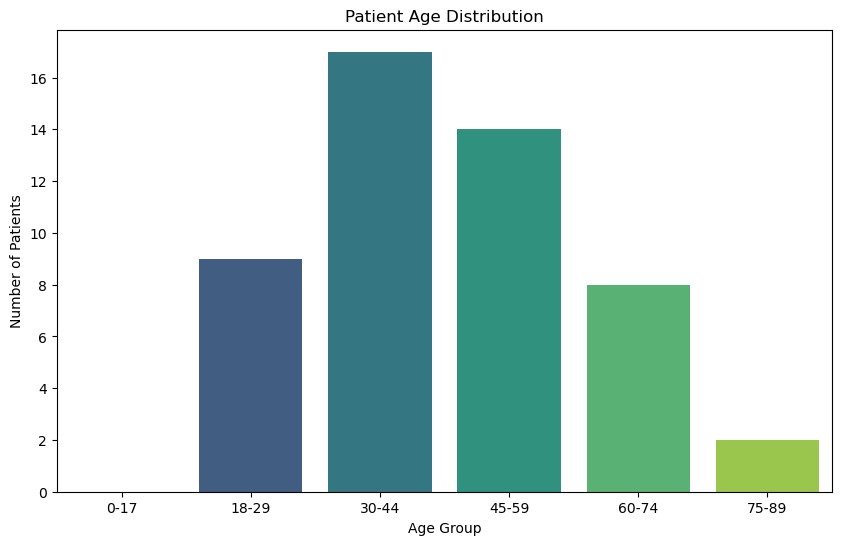

In [ ]:
# patient age distribution
patients_data = pd.read_csv('C:/Users/enosa/OneDrive/Desktop/Data Analysis/Datasets/Hospital management/patients.csv')
patients_data['age'] = 2025 -pd.to_datetime(patients_data['date_of_birth']).dt.year
bins = [0, 18, 30, 45, 60, 75, 90]
labels = ['0-17', '18-29', '30-44', '45-59', '60-74', '75-89']
patients_data['age_group'] = pd.cut(patients_data['age'], bins=bins, labels=labels, right=False)
patients_data['age_group'].value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.barplot(x=patients_data['age_group'].value_counts().sort_index().index, y=patients_data['age_group'].value_counts().sort_index().values, palette='viridis')
plt.title('Patient Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.show()

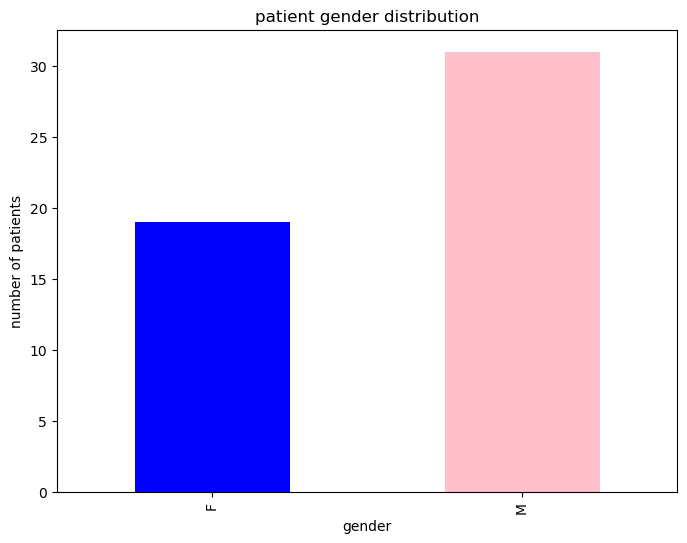

In [ ]:
# gender distribution
patients_gender = patients_data.groupby('gender')['patient_id'].count()
patients_gender.plot(kind='bar', color=['blue', 'pink'], figsize=(8,6))
plt.title('patient gender distribution')
plt.xlabel('gender')
plt.ylabel('number of patients')
plt.show()

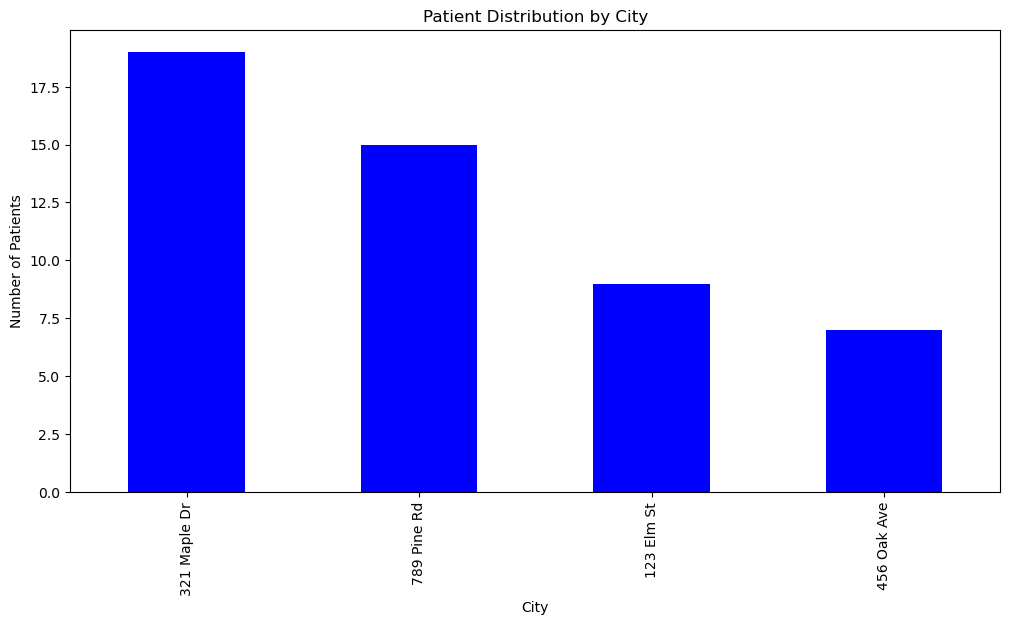

In [ ]:
#geographic clustering of patients
patients_data['address'].value_counts().plot(kind='bar', figsize=(12,6), color='blue')
plt.title('Patient Distribution by City')
plt.xlabel('City')
plt.ylabel('Number of Patients')
plt.show()

In [ ]:
treat = pd.read_csv('C:/Users/enosa/OneDrive/Desktop/Data Analysis/Datasets/Hospital management/treatments.csv')


In [ ]:
#Treatment Utilization Funnel: Analysis showing which reason_for_visit categories lead to the highest utilization of specific treatment_type (e.g., how many "annual checkups" result in an "X-ray").
# Merge appointments and treatments data
merged_data = pd.merge(appointments_data, treat, on='appointment_id')
# Group by reason_for_visit and treatment_type to count occurrences
merged_data.groupby(['reason_for_visit', 'treatment_type']).size().unstack(fill_value=0)

treatment_type,Chemotherapy,ECG,MRI,Physiotherapy,X-Ray
reason_for_visit,,,,,
Checkup,8,10,6,10,11
Consultation,11,6,6,11,9
Emergency,8,6,7,3,5
Follow-up,14,5,9,7,6
Therapy,8,11,8,5,10


In [ ]:
# New Patient Acquisition Trends
patients_data.groupby('registration_date')['registration_date'].count()

registration_date
2021-01-23    1
2021-03-02    1
2021-03-09    1
2021-04-19    1
2021-05-11    1
2021-05-13    1
2021-05-25    1
2021-07-23    1
2021-07-31    1
2021-08-07    1
2021-08-15    1
2021-09-02    1
2021-09-09    1
2021-09-25    1
2021-09-29    1
2021-09-30    1
2021-10-02    1
2021-10-16    1
2021-12-23    1
2021-12-25    1
2021-12-27    1
2022-01-15    1
2022-01-19    1
2022-02-07    1
2022-03-15    1
2022-04-03    1
2022-05-20    1
2022-06-23    1
2022-06-28    1
2022-07-16    1
2022-07-18    1
2022-08-24    1
2022-09-18    1
2022-09-23    1
2022-09-26    1
2022-09-27    1
2022-10-02    1
2022-10-04    1
2023-01-26    1
2023-04-19    1
2023-04-27    1
2023-04-28    1
2023-05-20    1
2023-06-14    1
2023-06-18    1
2023-06-19    1
2023-06-24    1
2023-07-09    1
2023-09-06    1
2023-12-12    1
Name: registration_date, dtype: int64

<Axes: ylabel='insurance_provider'>

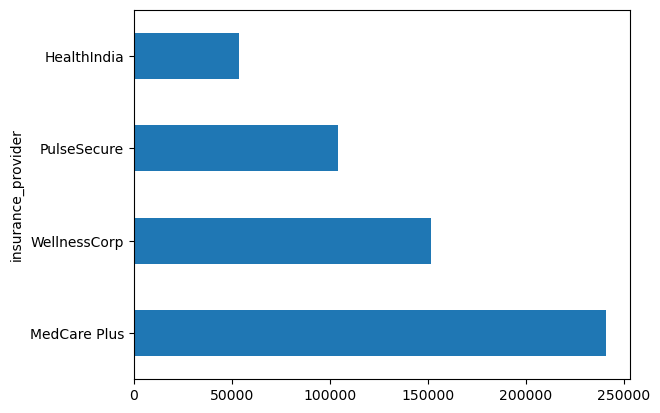

In [ ]:
# Insurance Provider Performance: Detailed reporting on the number of patients and total bill amount associated with the top 3-5 largest insurance_provider to evaluate contract value and payment reliability.
#merge billing and patients data
bill_pat = pd.merge(billing_data,patients_data, on= 'patient_id')
bill_pat.groupby('insurance_provider')['amount'].sum().sort_values(ascending=False).plot(kind = 'barh')